# Taller de Tratamiento de Datos con Python

## Autor: Juan Luis Cano Rodríguez <hello@juanlu.space>

## 2022-03-04 MPVD UAH

# Índice

1. Introducción
2. Lectura y limpieza de datos
3. Análisis exploratorio básico
4. Expresiones regulares para búsqueda de texto
5. Visualización de series temporales

# ¿Quién soy yo?

![Juanlu @ UIS](img/juanl-uis.jpg)

* **Ingeniero Aeronáutico** y pythonista autodidacta de Madrid, España 🇪🇸
* **Defensor del Data Scientist** (_Data Scientist Advocate_) en **Orchest** 🥑
* **Socio fundador y ex-presidente** de la Asociación Python España y organizador de PyConES por 7 años 🐍
* **Colaborador** en proyectos de Python Científico: NumPy, SciPy, conda, astropy, poliastro, memory-profiler...
* **Profesor asociado** en **IE** y **ESADE** de Python para Big Data
* Amante del código abierto y el hard rock 🤘

Encantado de conectar en LinkedIn: https://www.linkedin.com/in/juanluiscanor/

## Qué vamos a ver:

- Cómo leer datos a partir de CSV
- La cruda realidad: limpiar los datos
- Análisis exploratorio básico: ¿qué datos tenemos?
- Expresiones regulares para búsqueda de texto
- Visualización de series temporales
- Cómo enfrentarse a un ~~folio~~ notebook en blanco

## Qué _no_ vamos a ver:

- De dónde extraemos los datos (eso formó parte del Módulo 5)
- Estadística (eso será el Módulo 7)
- Visualización avanzada (eso serán los Módulos 8 y 9)
- Datos no tabulares (ya habéis visto JSON en el Módulo 5, y en el Módulo 10 veréis datos geográficos)
- Cómo conseguir que la administración suelte los datos que queremos (...)

# Los datos

Reuniones entre la Comisión Europea y lobbies que declararon tener interés en salud pública https://datos.civio.es/dataset/reuniones-entre-la-comision-europea-y-lobbies-que-declararon-tener-interes-en-salud-publica/

- **Formato**: `CSV`
- **Tamaño**: 2.6 MB
- **Rango temporal**: 2014-11-13 a 2021-03-15

![Civio](img/civio-portrait.png)

<small>Apoyad a Civio, son mu majos</small>

## La realidad

| ![Most time consuming](img/most-time-consuming.jpg) | ![Least enjoyable](img/least-enjoyable.jpg) |
|-----------------------------------------------------|---------------------------------------------|

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=781bd4ff6f63

## Posibles preguntas

- ¿Cuántas reuniones sobre el Mercado Único Europeo (DSM)?
- ¿Cuántos temas contuvieron la palabra "circular"?
- ¿Cuántos lobbies se reunieron sobre "aviación"?
- ¿Cuántas reuniones fueron en Bruselas vs en remoto?
- ¿Cuántas reuniones con Pfizer, Astra Zeneca, y Janssen? ¿Cuántas personas implicadas?
- ¿Cuántas reuniones con la Agencia Europea del Medicamento (EMA) para la aprobación de vacunas?
- ¿Cuántas reuniones para "aligerar" los procesos para aprobar el uso de ciertos medicamentos contra la COVID-19?
- ¿Cuántas reuniones para fijación de precios (tanto de vacunas como de otros medicamentos)?
- ¿Cuántas reuniones sobre opiáceos?
- ¿Cuántas reuniones sobre salud mental?

---

Empezamos por instalar los requisitos:

In [ ]:
# %pip install -r requirements.in

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [25]:
df = pd.read_csv("commission-lobbists-meetings.csv", parse_dates=["date"], dayfirst=True)
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,2015-04-15,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-30,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-06,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",2019-02-21,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,2019-01-08,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN


In [26]:
df.describe()

,nr,Unnamed: 8,Unnamed: 9
count,12025.000000,0.0,0.0
mean,24.935634,NaN,NaN
std,34.911903,NaN,NaN
min,1.000000,NaN,NaN
25%,3.000000,NaN,NaN
50%,11.000000,NaN,NaN
75%,30.000000,NaN,NaN
max,250.000000,NaN,NaN


In [27]:
df.describe(include="all")

/tmp/ipykernel_493/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,12025.000000,12025,12025,12025,12024,12025,12025,12025,0.0,0.0,1
unique,NaN,1729,101,1452,574,8012,1398,2,NaN,NaN,1
top,NaN,"Günther Oettinger, Commissioner",Digital Economy and Society,2020-04-29 00:00:00,Brussels,DSM,Google,False,NaN,NaN,15/03/2021
freq,NaN,294,692,45,7205,163,250,10669,NaN,NaN,1
first,NaN,NaN,NaN,2014-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24.935634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34.911903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# df.isnull()  # Lo mismo
df.isna().any()

nr                           False
commission_representative    False
portfolio                    False
date                         False
location                      True
subject(s)-edited            False
lobbyist                     False
health_meeting_or_lab        False
Unnamed: 8                    True
Unnamed: 9                    True
Unnamed: 10                   True
dtype: bool

In [29]:
df.isna().all()

nr                           False
commission_representative    False
portfolio                    False
date                         False
location                     False
subject(s)-edited            False
lobbyist                     False
health_meeting_or_lab        False
Unnamed: 8                    True
Unnamed: 9                    True
Unnamed: 10                  False
dtype: bool

In [30]:
df["Unnamed: 10"].dropna()

12004    15/03/2021
Name: Unnamed: 10, dtype: object

In [31]:
df.loc[12004]

nr                                                                           4
commission_representative    Isabelle Perignon, Cabinet member of Didier Re...
portfolio                                                              Justice
date                                                       2020-12-17 00:00:00
location                                                    video conferencing
subject(s)-edited                            consumer policy and green pledges
lobbyist                                      Nestlé S.A. (Nestlé (SIX/ NESN))
health_meeting_or_lab                                                    False
Unnamed: 8                                                                 NaN
Unnamed: 9                                                                 NaN
Unnamed: 10                                                         15/03/2021
Name: 12004, dtype: object

In [32]:
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 10"])
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,2015-04-15,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-30,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-06,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",2019-02-21,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,2019-01-08,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False


In [36]:
sorted(df["lobbyist"].unique().tolist())

['#SustainablePublicAffairs (#Sustainable)',
 '(SETE) GREEK TOURISM CONFEDERATION (SETE)',
 '3M (3M)',
 'ABDA - Bundesvereinigung Deutscher Apothekerverbände e.V. (ABDA)',
 'ACV Puls',
 'ADS Insight (ADS Insight)',
 'AGE Platform Europe (AGE)',
 'AGORIA',
 'AIM European Brands Association (AIM)',
 'AIR LIQUIDE (AIR LIQUIDE)',
 'ALAN',
 'ALPHALEX-CONSULT GEIE',
 'AMC Strategy',
 'AMICE - Association of Mutual Insurers and Insurance Cooperatives in Europe (AMICE)',
 'AMISA2 (AMISA2)',
 'ANCRE',
 'ANFACO-CECOPESCA',
 'AOKpass Pte Ltd',
 'APCO Worldwide',
 'APERAM SA (APERAM)',
 'ARCHE NOAH, Gesellschaft für die Erhaltung der Kulturpflanzenvielfalt und ihre Entwicklung (ARCHE NOAH)',
 'ARCTURUS GROUP',
 'ARD-Verbindungsbüro Brüssel',
 'ART 2030',
 'ASDM Consulting (ASDM Consulting)',
 'ASPEN INSTITUTE ITALIA (AII)',
 'ASSOCIATION MEDICALE EUROPEENNE (EMA)',
 'ATREVIA COMUNICACIÓN',
 'AXA',
 'Aarhus University (AU)',
 'AbbVie (ABBV)',
 'Abbott (ABT)',
 'Aboca S.p.a. Società Agricola',
 'Aca

In [41]:
df["lobbyist"].value_counts().nlargest(20)

Google                                                                                 250
Bureau Européen des Unions de Consommateurs (BEUC)                                     189
Transport and Environment (European Federation for Transport and Environment) (T&E)    155
WWF European Policy Programme (WWF EPO)                                                151
DIGITALEUROPE (DE)                                                                     151
Microsoft Corporation                                                                  144
American Chamber of Commerce to the European Union (AmCham EU)                         144
EuroCommerce                                                                           138
European farmers (COPA)                                                                137
Vodafone Belgium SA (VBSA)                                                             123
European Chemical Industry Council (Cefic)                                             119

¿Sobre qué temas versan las reuniones con Google?

In [44]:
#                              Ojo! Con el doble igual
filtro_google = df["lobbyist"] == "Google"
filtro_google.value_counts()

False    11775
True       250
Name: lobbyist, dtype: int64

In [46]:
#                                          ==
filtro_salud = df["health_meeting_or_lab"] == True
filtro_salud.value_counts()

False    10669
True      1356
Name: health_meeting_or_lab, dtype: int64

In [47]:
df.loc[filtro_google & filtro_salud]

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab
11246,1,"Věra Jourová, Vice-President",Values and Transparency,2021-02-22,Videoconference,Disinformation COVID -19,Google,True
11251,6,"Lucrezia Busa, Cabinet member of Didier Reynde...",Justice,2020-11-20,video conference,"Artificial Intelligence, data protection, DSA,...",Google,True
11258,13,"Anthony Whelan, Cabinet member of Ursula von d...",President,2020-08-11,Brussels (video conference),"COVID-19 response (authoritative information, ...",Google,True
11260,15,"Věra Jourová, Vice-President",Values and Transparency,2020-07-23,videoconference,"Covid disinformation, EDAP",Google,True
11263,18,"Mariya Gabriel, Commissioner",Innovation and Youth,2020-07-09,Video- conferencing,"The COVID-19 crisis, particularly in facilitat...",Google,True
11267,22,"Filomena Chirico, Cabinet member of Thierry Br...",Internal Market,2020-05-04,videoconference,"AI, DSA, COVID",Google,True
11268,23,"Geneviève Tuts, Cabinet member of Didier Reynd...",Justice,2020-04-28,Video conference,following topics 1- Google initiatives in the ...,Google,True
11271,26,"Daniel Braun, Cabinet member of Věra Jourová;M...",Values and Transparency,2020-03-27,videoconference,Disinformation /COVID-19,Google,True
11273,28,"Věra Jourová, Vice-President;Daniel Braun, Cab...",Values and Transparency,2020-03-03,"Brussels, Belgium","Disinfromation, COVID-19",Google,True
11472,227,"Arunas Vinciunas, Cabinet member of Vytenis An...",Health & Food Safety,2015-05-27,"Brussels, Belgium",Telemedicine,Google,True


In [54]:
df.loc[9832, "subject(s)-edited"]

'Access to health services, including pharmaceuticals, in developing countries'

In [57]:
"Pfizer" in df["lobbyist"]

False

In [60]:
# df.loc[df["lobbyist"].str.lower().str.contains("pfizer"), "lobbyist"]

In [66]:
df.loc[
    (df["lobbyist"] == "Pfizer Inc. (PFE)") & filtro_salud
]

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab
11814,1,"Thierry Breton, Commissioner",Internal Market,2021-02-21,"Puurs, Belgium",COVID-19 vaccines production,Pfizer Inc. (PFE),True
11815,2,"Ursula von der Leyen, President",President,2021-01-31,Videoconference,Meeting with CEOs of the pharmaceutical compan...,Pfizer Inc. (PFE),True
11816,3,"Nele Eichhorn, Cabinet member of Cecilia Malms...",Trade,2018-11-27,Brussels,"EU-US relations, trade aspects of Brexit",Pfizer Inc. (PFE),True
11817,4,"Vytenis Andriukaitis, Commissioner;Annika Nowa...",Health & Food Safety,2017-11-29,Brussels,"Pharmaceutical incentives, antimicrobial resis...",Pfizer Inc. (PFE),True
11818,5,"Jyrki Katainen, Vice-President","Jobs, Growth, Investment and Competitiveness",2017-11-21,Brussels,Internal Market's industrial property legal fr...,Pfizer Inc. (PFE),True
11819,6,"Pierre Moscovici, Commissioner;Simon O'Connor,...","Economic and Financial Affairs, Taxation and C...",2017-09-01,Cernobbio,Exchange of views on the Italian and euro zone...,Pfizer Inc. (PFE),True
11820,7,"Bernardus Smulders, Cabinet member of Frans Ti...","Better Regulation, Interinstitutional Relation...",2016-01-14,Brussels,AECA Round-Table on “Dealing with Regulatory B...,Pfizer Inc. (PFE),True
11821,8,"Annika Nowak, Cabinet member of Vytenis Andriu...",Health & Food Safety,2015-03-02,Brussels,Access to innovative medicine,Pfizer Inc. (PFE),True
11822,9,"Rolf Carsten Bermig, Cabinet member of Elżbiet...","Internal Market, Industry, Entrepreneurship an...",2015-01-27,Brussels Belgium,Introductory meeting,Pfizer Inc. (PFE),True


In [68]:
(df["lobbyist"] == "Pfizer").value_counts()

False    12025
Name: lobbyist, dtype: int64

In [69]:
"hola mundo".split()

['hola', 'mundo']

In [70]:
"Juan Luis Cano".lower()

'juan luis cano'

In [76]:
# .str para los métodos de strings
# regex=False para no utilizar expresiones regulares
filtro_pfizer = df["lobbyist"].str.lower().str.contains("pfizer", regex=False)
filtro_pfizer.value_counts()

False    12016
True         9
Name: lobbyist, dtype: int64

In [78]:
(df["location"] == "Brussels").value_counts()

True     7205
False    4820
Name: location, dtype: int64

In [79]:
(df["location"].str.lower().str.contains("brussels", regex=False)).value_counts()

True     9424
False    2600
Name: location, dtype: int64

In [88]:
# str.contains puede devolver valores nulos
# hay que rellenarlos (por ejemplo con .fillna(...))
filtro_contiene_brussels = df["location"].str.lower().str.contains("brussels", regex=False).fillna(False)
filtro_contiene_brussels.value_counts()

True     9424
False    2601
Name: location, dtype: int64

In [89]:
filtro_contiene_brussels.isnull().any()

False

In [102]:
sorted(df.loc[~filtro_contiene_brussels, "location"].str.lower().dropna().unique().tolist())

['1 rue zinner',
 'algiers',
 'amcham',
 'amsterdam',
 'amsterdam - elsevier hq',
 'amsterdam, the netherlands',
 'ancient olympia, greece',
 'antwerp',
 'athens',
 'atlanta',
 'avenue des arts 53',
 'avenue tervuren 168',
 'avignon, france',
 'b232 07/066',
 'barcelona',
 'beaulieu',
 'belgium',
 'belgium - brussel',
 'belgium, bruxelles, berl',
 'ber 08/323',
 'ber 12/243',
 'beralymont',
 'berl',
 'berl - bruxelles',
 'berl - bxl',
 'berl 08/304',
 'berl 08/318',
 'berl 08/323',
 'berl 09/346',
 'berl 09/374',
 'berl 10/021',
 'berl 10/041',
 'berl 10/152',
 'berl 10/180',
 'berl 10/286',
 'berl 10/390',
 'berl 10/390 deutsche sozialversicherung europavertretung',
 'berl 10/394',
 'berl 10/411',
 'berl 11/076',
 'berl 11/176',
 'berl 12/217',
 'berl 12/243',
 'berl 12/62',
 'berl 13/093',
 'berl 13/173',
 'berl 13/244',
 'berl 2/320',
 'berl 40/411',
 'berl 8/165',
 'berl 8/26',
 'berl 8/275',
 'berl 8/304',
 'berl 8/36',
 'berl 8/97',
 'berl 8th floor',
 'berl bruxelles',
 'berl bu

In [96]:
sorted(df.loc[~filtro_contiene_brussels, "location"].str.lower().dropna().unique().tolist())

['1 rue zinner',
 'algiers',
 'amcham',
 'amsterdam',
 'amsterdam - elsevier hq',
 'amsterdam, the netherlands',
 'ancient olympia, greece',
 'antwerp',
 'athens',
 'atlanta',
 'avenue des arts 53',
 'avenue tervuren 168',
 'avignon, france',
 'b232 07/066',
 'barcelona',
 'beaulieu',
 'belgium',
 'belgium - brussel',
 'belgium, bruxelles, berl',
 'ber 08/323',
 'ber 12/243',
 'beralymont',
 'berl',
 'berl - bruxelles',
 'berl - bxl',
 'berl 08/304',
 'berl 08/318',
 'berl 08/323',
 'berl 09/346',
 'berl 09/374',
 'berl 10/021',
 'berl 10/041',
 'berl 10/152',
 'berl 10/180',
 'berl 10/286',
 'berl 10/390',
 'berl 10/390 deutsche sozialversicherung europavertretung',
 'berl 10/394',
 'berl 10/411',
 'berl 11/076',
 'berl 11/176',
 'berl 12/217',
 'berl 12/243',
 'berl 12/62',
 'berl 13/093',
 'berl 13/173',
 'berl 13/244',
 'berl 2/320',
 'berl 40/411',
 'berl 8/165',
 'berl 8/26',
 'berl 8/275',
 'berl 8/304',
 'berl 8/36',
 'berl 8/97',
 'berl 8th floor',
 'berl bruxelles',
 'berl bu

In [77]:
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,2015-04-15,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-30,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,2015-01-06,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",2019-02-21,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,2019-01-08,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False


In [110]:
df["location"].str.lower().str.contains("brussels", regex=False).fillna(False).value_counts()

True     9424
False    2601
Name: location, dtype: int64

In [121]:
filtro_bruselas = df["location"].str.lower().str.contains("bruss?els?|bruxelles|brüssel", regex=True).fillna(False)
filtro_bruselas

0         True
1         True
2         True
3         True
4        False
         ...  
12020     True
12021     True
12022     True
12023     True
12024     True
Name: location, Length: 12025, dtype: bool

In [117]:
filtro_bruselas_simple = df["location"].str.lower().str.contains("bruss?", regex=True).fillna(False)

In [122]:
df.loc[filtro_bruselas, "location"].str.lower().unique()

array(['brussels, belgium', 'brussels', 'brusselse', 'brussels - virtual',
       'brussels, berl', 'belgium, brussels, berl',
       'videoconference (brussels)', 'brussels - video conference',
       'brussels/online', 'brussels belguim', 'brussels, be',
       'brussels (vc)', 'bruxelles', 'video conference (brussels)',
       'brussels - videoconference', 'brussels - ec premises',
       'amcham eu office, on avenue des arts 53, 1000 brussels',
       'video conference - brussels', 'brussels (webex)',
       'brussels belgium', 'brussels (video conference)',
       'brussels (belgium)', 'brussels - belgium',
       'brussels, video conference', 'brussels b232', 'brey - brussels',
       'brussels, berlaymont', 'brussels - online', 'bruxelles, belgique',
       'brussels, berlgium', 'european commission, brussels, belgium',
       'berlaymont, brussels', 'berlaymont brussels', 'brussels, online',
       'berlaymont, brussels, belgium', 'brey-brussels',
       'brussels - webex meeti

In [127]:
filtro_remoto = df["location"].str.lower().str.contains("webex|zoom|video|skype", regex=True).fillna(False)
filtro_remoto.value_counts()

False    10742
True      1283
Name: location, dtype: int64

In [129]:
df.loc[filtro_remoto, "location"].str.lower().unique()

array(['webex', 'video-call', 'videoconference',
       'videoconference (brussels)', 'brussels - video conference',
       'video conferencing', 'video-conferencing',
       'video conference (skype)', 'video-conference', 'video conference',
       'videocall', 'video- conferencing', 'video conference (brussels)',
       'video - conferencing', 'brussels - videoconference',
       'video conference - brussels', 'webex meeting', 'brussels (webex)',
       'brussels (video conference)', 'videoconference call',
       'brussels, video conference', 'video meeting', 'video phone call',
       'zoom platform', 'brussels - webex meeting', 'video call',
       'videoconferencing', 'brussels, skype meeting', 'videomeeting',
       'brussels/ videocall', 'bruxelles - skype meeting',
       'brussels - webex call', 'videoconference (webex)', 'webex vc',
       'webex video meeting', 'bruxelles - skype call',
       'brussles - video conference', 'brussels video meeting',
       'brussels - skype

¿Cuántas reuniones hay de cada categoría?

In [131]:
df["portfolio"].value_counts()

Digital Economy and Society                                                                   692
Health & Food Safety                                                                          688
Jobs, Growth, Investment and Competitiveness                                                  687
Agriculture & Rural Development                                                               520
Digital Single Market                                                                         507
                                                                                             ... 
Director-General of Structural Reform Support (REFORM)                                          1
Acting Director-General of Justice and Consumers (JUST)                                         1
the Head of Service for Foreign Policy Instruments of Foreign Policy Instruments(FPI)           1
Euro and Social Dialogue, also in charge of Financial Stability, and Capital Markets Union      1
Education, Promotion

¿Cuántas reuniones hay de cada categoría cada año?

In [139]:
# df["date"].dt.day_name(locale="es_ES.UTF-8")

In [143]:
df["date"].dt.year.value_counts()

2015    2483
2020    2480
2016    2074
2018    1728
2017    1667
2019     949
2021     434
2014     210
Name: date, dtype: int64

In [145]:
df.groupby([df["date"].dt.year, "portfolio"]).size()

date  portfolio                                                                                             
2014  Acting Director- General of Informatics(DIGIT)                                                             1
      Agriculture & Rural Development                                                                           16
      Better Regulation, Interinstitutional Relations, the Rule of Law and the Charter of Fundamental Rights     4
      Climate Action & Energy                                                                                    8
      Competition                                                                                                2
                                                                                                                ..
2021  Neighbourhood and Enlargement                                                                              2
      President                                                                       

In [147]:
df.groupby([df["date"].dt.year, "portfolio"]).size().unstack()

portfolio,Acting Director- General of Informatics(DIGIT),Acting Director- General of Justice and Consumers (JUST),Acting Director- General of Structural Reform Support(REFORM),Acting Director- General of Taxation and Customs Union (TAXUD),Acting Director-General of Justice and Consumers (JUST),Agriculture,Agriculture & Rural Development,An Economy that Works for People,"Better Regulation, Interinstitutional Relations, the Rule of Law and the Charter of Fundamental Rights",Budget & Human Resources,...,Promoting the European Way of Life,Regional Policy,"Research, Science and Innovation",Secretary-General of Secretariat- General(SG),Security Union,Trade,Transport,Values and Transparency,of Regulatory Scrutiny Board (RSB),the Head of Service for Foreign Policy Instruments of Foreign Policy Instruments(FPI)
date,,,,,,,,,,,,,,,,,,,,,
2014,1.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,4.0,NaN,...,NaN,NaN,6.0,1.0,NaN,16.0,3.0,NaN,NaN,NaN
2015,3.0,3.0,2.0,NaN,1.0,NaN,97.0,NaN,97.0,5.0,...,NaN,14.0,110.0,10.0,NaN,119.0,55.0,NaN,NaN,NaN
2016,10.0,7.0,NaN,6.0,NaN,NaN,138.0,NaN,62.0,13.0,...,NaN,11.0,53.0,NaN,5.0,87.0,45.0,NaN,NaN,NaN
2017,3.0,2.0,NaN,3.0,NaN,NaN,137.0,NaN,54.0,73.0,...,NaN,4.0,69.0,3.0,17.0,81.0,43.0,NaN,NaN,NaN
2018,5.0,NaN,NaN,20.0,NaN,NaN,99.0,NaN,91.0,59.0,...,NaN,2.0,71.0,12.0,11.0,83.0,41.0,NaN,NaN,NaN
2019,3.0,1.0,NaN,4.0,NaN,1.0,33.0,3.0,51.0,50.0,...,1.0,1.0,32.0,10.0,13.0,31.0,6.0,NaN,2.0,1.0
2020,NaN,4.0,NaN,1.0,NaN,114.0,NaN,86.0,NaN,NaN,...,35.0,NaN,NaN,NaN,NaN,NaN,35.0,71.0,3.0,NaN
2021,NaN,1.0,NaN,NaN,NaN,12.0,NaN,19.0,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,6.0,13.0,NaN,NaN


In [150]:
df.pivot_table(
    index=df["date"].dt.year,
    columns="portfolio",
    aggfunc="size"
).fillna(0)

portfolio,Acting Director- General of Informatics(DIGIT),Acting Director- General of Justice and Consumers (JUST),Acting Director- General of Structural Reform Support(REFORM),Acting Director- General of Taxation and Customs Union (TAXUD),Acting Director-General of Justice and Consumers (JUST),Agriculture,Agriculture & Rural Development,An Economy that Works for People,"Better Regulation, Interinstitutional Relations, the Rule of Law and the Charter of Fundamental Rights",Budget & Human Resources,...,Promoting the European Way of Life,Regional Policy,"Research, Science and Innovation",Secretary-General of Secretariat- General(SG),Security Union,Trade,Transport,Values and Transparency,of Regulatory Scrutiny Board (RSB),the Head of Service for Foreign Policy Instruments of Foreign Policy Instruments(FPI)
date,,,,,,,,,,,,,,,,,,,,,
2014,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,4.0,0.0,...,0.0,0.0,6.0,1.0,0.0,16.0,3.0,0.0,0.0,0.0
2015,3.0,3.0,2.0,0.0,1.0,0.0,97.0,0.0,97.0,5.0,...,0.0,14.0,110.0,10.0,0.0,119.0,55.0,0.0,0.0,0.0
2016,10.0,7.0,0.0,6.0,0.0,0.0,138.0,0.0,62.0,13.0,...,0.0,11.0,53.0,0.0,5.0,87.0,45.0,0.0,0.0,0.0
2017,3.0,2.0,0.0,3.0,0.0,0.0,137.0,0.0,54.0,73.0,...,0.0,4.0,69.0,3.0,17.0,81.0,43.0,0.0,0.0,0.0
2018,5.0,0.0,0.0,20.0,0.0,0.0,99.0,0.0,91.0,59.0,...,0.0,2.0,71.0,12.0,11.0,83.0,41.0,0.0,0.0,0.0
2019,3.0,1.0,0.0,4.0,0.0,1.0,33.0,3.0,51.0,50.0,...,1.0,1.0,32.0,10.0,13.0,31.0,6.0,0.0,2.0,1.0
2020,0.0,4.0,0.0,1.0,0.0,114.0,0.0,86.0,0.0,0.0,...,35.0,0.0,0.0,0.0,0.0,0.0,35.0,71.0,3.0,0.0
2021,0.0,1.0,0.0,0.0,0.0,12.0,0.0,19.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,0.0,0.0


¿Cómo han evolucionado las reuniones remotas a lo largo del tiempo?

In [152]:
filtro_remoto

0        False
1        False
2        False
3        False
4        False
         ...  
12020    False
12021    False
12022    False
12023    False
12024    False
Name: location, Length: 12025, dtype: bool

In [157]:
reuniones = df.groupby(["date", filtro_remoto]).size().unstack().fillna(0)
reuniones.head()

location,False,True
date,,
2014-11-13,4.0,0.0
2014-11-18,1.0,0.0
2014-11-20,1.0,0.0
2014-11-21,1.0,0.0
2014-11-24,1.0,0.0


<AxesSubplot:xlabel='date'>

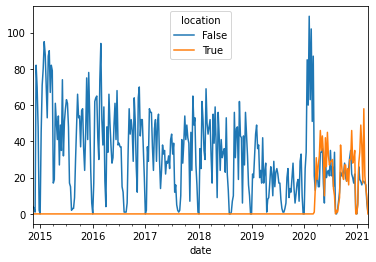

In [159]:
reuniones.resample("W").sum().plot()